In [1]:
import matplotlib.pyplot as plt
from fns import * 
# a module that contains all the required functions 
# that generate graph 1 of https://arxiv.org/abs/1808.08927

primes = np.array([], dtype='int32')
for i in range(20, 332): #332
    if is_prime(i):
        primes = np.append(primes, i)
        
        np.savetxt('primes.txt', primes)

In [3]:
primes = np.loadtxt('primes.txt')

biprimes = np.array([], dtype='int32')
for i in range(len(primes)):
    for j in range(i + 1, len(primes)):
        if i != j:
            res = primes[i] * primes[j]
            biprimes = np.append(biprimes, res)
            
            np.savetxt('biprimes.txt', biprimes)

In [5]:
biprimes = np.loadtxt('biprimes.txt').astype('int32')

biprimes_final = np.array([], dtype='int32')
number_of_qubits = np.array([], dtype='int32')
for i in range(len(biprimes)):
    num_variables = num_variables_final(biprimes[i])
    biprimes_final = np.append(biprimes_final, biprimes[i])
    number_of_qubits = np.append(number_of_qubits, num_variables)
    
    np.savetxt('biprimes_final.txt', biprimes_final)
    np.savetxt('number_of_qubits.txt', number_of_qubits)

In [7]:
biprimes_final = np.loadtxt('biprimes_final.txt')
number_of_qubits = np.loadtxt('number_of_qubits.txt').astype('int32')

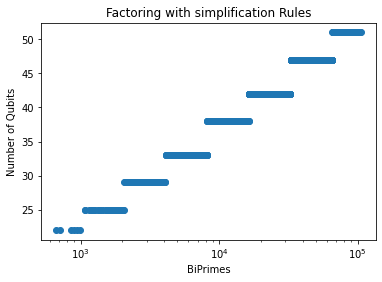

In [9]:
plt.scatter(biprimes_final, number_of_qubits)
plt.title('Factoring with simplification Rules')
plt.xscale('log')
plt.xlabel('BiPrimes')
plt.ylabel('Number of Qubits')
plt.savefig('graph1.png')
plt.show()